Abstract/ Objective 

    Maximizing the amount of items on trailers represents a potential fincancial cost savings for companies that ship goods.  It also represents a potential reduction in environmental impact as the amount of fuel per unit shipped may be reduced.  There are a number of factors that prevent companies from fully loading their trailers.  Among them are customer demand, weight of the items, labor costs, and labor shortages.  The following series of logical premises and equations are designed to help companies fully utilize trailers without sacrificing customer expectations.

# The problem

    Imagine the following scenario:  You are a company that ships goods.  In order to fullfill customer expectations, some of the items shipped need to be sent out on the earliest available trailer (a.k.a. "high priority items").  Other items need to be shipped in two to three days in order to meet customer expectations (a.k.a. "middle priority items").  And some need to be shipped in four or more days in order to meet customer expectations (a.k.a. "low priority items").  If one sends only the high priority items, the trailer will not be fully loaded.  If instead one sends all of the items, one will need more than one trailer and the second trialer will not be fully loaded.  Moreover, there is no easy way to determine what is or isn't a 'high priority item' once it has been sent to the trialer to be loaded.  Ideally, one wants to send out 10 to 11 fully loaded trailers per week to this destination as opposed to 14 trialers per week, 7 of which are only partially loaded. 
    
    One option to solve this problem is to program a calculator-like object to solve it.  This can be done through the programming language Python.  The first task one needs to complete is to define "What is a fully loaded trialer?".  Depending on what one is shipping and the methology used to ship those items, this number could vary.   If one is shipping lighter items and is double-stacking pallets in a standard 53' trailer, that number is 60 pallets.  If one is instead using a fork-lift to fully load a 53' trailer with single-stacked pallets, that number is 30 pallets.  If one is instead using a pallet jack to "straight load" a 53' trailer with single-stacked pallets, that number is 24.  There are also other facors that can come into play such as non-stardard pallets and trailers shorter than 53 feet such as box trucks. However, if one has a standardized way of shipping items to a destination, one can use that standard to define "fully loaded trailer".  For the first example illustrated in this write-up, we are going to assume that fully-loaded means a 53' trailer filled with 60 double-stacked pallets.  The equations will work for other shipping methods but one will need to know the number of pallets (or pallet-alternative) that is expected to fit into a loaded trialer and replace "60" with that number.  The other number one will need to know is the number of items in a trailer when it is fully loaded.  I have used a random number generator for three hypothetical destinations to derive the number of units in a trailer once it has been loaded with 60 pallets and the number of customer orders that destination has had in the past.  In the real world, these numbers would be extracted from a database that contains information about the number of pallets in a trailer, the number of units sent out in trailers with the maximum number of pallets, and the number of customer orders sent out on a particular day.
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

"Loads departing from Pittsburgh, PA"

"Washington, DC" 

DC_units_in_loads_with_60p_for_past100day = np.random.normal(loc=12500, scale= 1500, size =(1,100))

dc_100d_60p_round = DC_units_in_loads_with_60p_for_past100day.round()

dc_units_for_past_100_days = np.random.normal(loc=17000, scale= 3000, size =(1,100))
dc_past_100d_units = dc_units_for_past_100_days.round()

"Boston, Mass"
Boston_units_in_loads_with_60p_for_past100day = np.random.normal(loc=10250, scale=1000, size=(1, 100))
Boston_100d_60p_round = Boston_units_in_loads_with_60p_for_past100day.round()

Boston_units_for_past_100_days = np.random.normal(loc=14250, scale= 2500, size=(1, 100))
Boston_past_100d_units = Boston_units_for_past_100_days.round()

"Charleston, WV:" 
WV_units_in_loads_with_60p_for_past100d = "None"

WV_units_for_past_100_days = np.random.normal(loc=5300, scale= 1000, size=(1, 100))
WV_past_100d_units = WV_units_for_past_100_days.round()


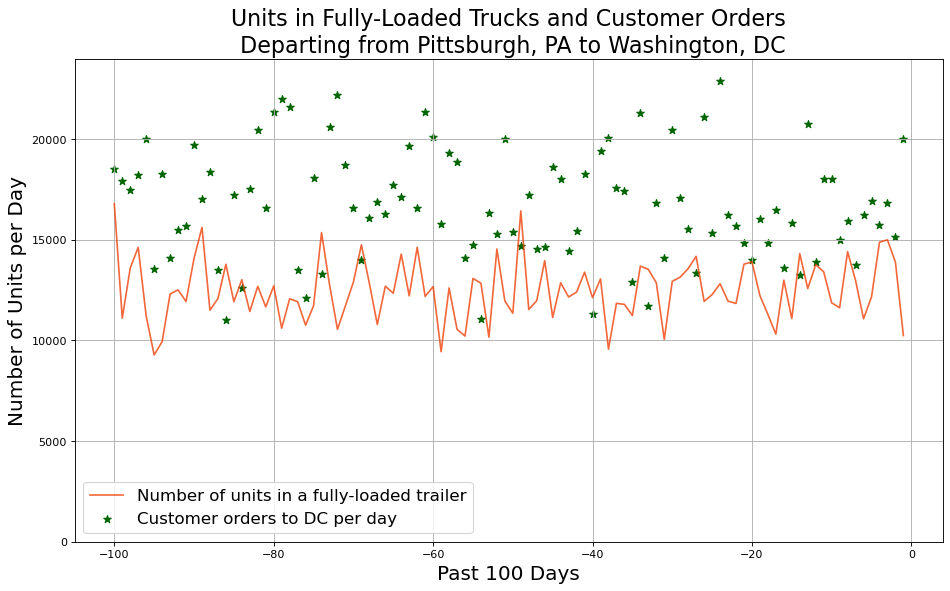

In [2]:
fig, ax = plt.subplots(figsize=(14,8), dpi=80)
X = np.arange(-100, 0)
DC = [16792., 11104., 13600., 14624., 11203.,  9280.,  9938., 12306.,
       12511., 11934., 14069., 15615., 11504., 12081., 13782., 11925.,
       13016., 11436., 12687., 11667., 12708., 10609., 12067., 11926.,
       10760., 11722., 15356., 12778., 10551., 11724., 12899., 14747.,
       12836., 10794., 12692., 12345., 14290., 12215., 14623., 12189.,
       12676.,  9443., 12608., 10557., 10217., 13080., 12842., 10162.,
       14540., 11958., 11352., 16436., 11540., 11975., 13965., 11138.,
       12865., 12157., 12402., 13391., 12125., 13058.,  9565., 11844.,
       11790., 11238., 13693., 13529., 12865., 10052., 12934., 13145.,
       13569., 14179., 11939., 12276., 12816., 11953., 11838., 13788.,
       13903., 12227., 11294., 10313., 12994., 11087., 14310., 12577.,
       13764., 13408., 11868., 11623., 14406., 12978., 11076., 12160.,
       14877., 14997., 13892., 10242.]
Y2 = [18497., 17942., 17491., 18220., 20012., 13566., 18281., 14091.,
       15464., 15703., 19712., 17017., 18365., 13522., 11031., 17224.,
       12618., 17520., 20439., 16574., 21338., 21976., 21595., 13496.,
       12128., 18069., 13306., 20602., 22174., 18707., 16595., 14000.,
       16059., 16879., 16256., 17707., 17146., 19644., 16601., 21368.,
       20112., 15784., 19300., 18881., 14113., 14756., 11060., 16319.,
       15306., 20003., 15395., 14706., 17200., 14566., 14636., 18616.,
       18023., 14467., 15456., 18272., 11322., 19392., 20035., 17565.,
       17432., 12919., 21313., 11718., 16823., 14091., 20451., 17093.,
       15515., 13365., 21077., 15352., 22900., 16210., 15676., 14857.,
       14011., 16029., 14846., 16476., 13584., 15821., 13271., 20755.,
       13883., 17997., 18010., 14989., 15918., 13732., 16232., 16909.,
       15719., 16835., 15150., 20027.]

ax.plot(X, DC, c='#ef4209', alpha=0.8, label="Number of units in a fully-loaded trailer")
ax.scatter(X, Y2, c='darkgreen', marker='*', s=50, label="Customer orders to DC per day");
ax.set_ylim(0, 24000);
ax.grid(True)

plt.title("Units in Fully-Loaded Trucks and Customer Orders\n Departing from Pittsburgh, PA to Washington, DC", fontsize=20)
plt.xlabel('Past 100 Days', fontsize=18)
plt.ylabel('Number of Units per Day', fontsize=18);
plt.legend(fontsize=15)
plt.show()

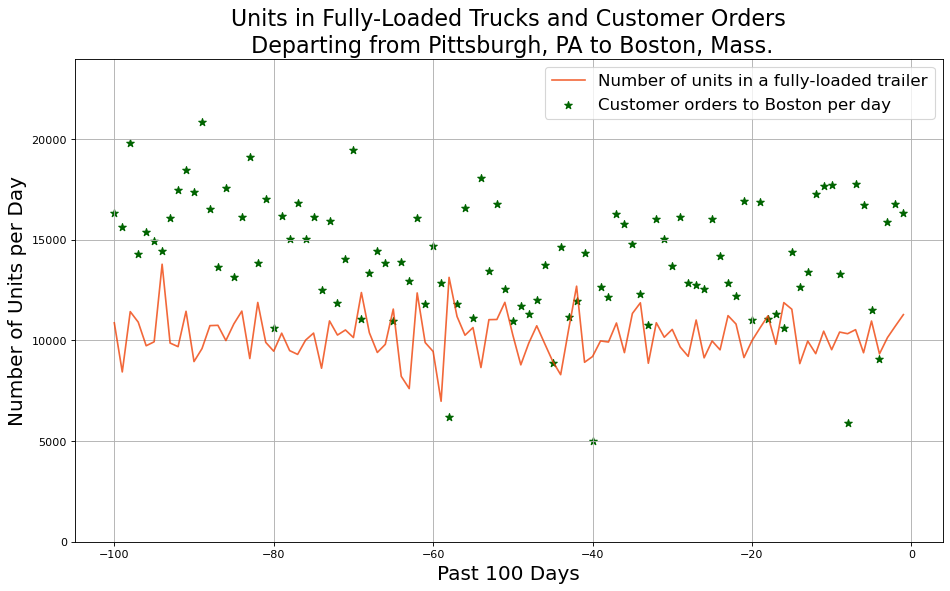

In [3]:
fig, ax = plt.subplots(figsize=(14,8), dpi=80)
X = np.arange(-100, 0)
Boston = [10874.,  8436., 11431., 10910.,  9736.,  9933., 13786.,  9871.,
         9691., 11449.,  8951.,  9593., 10736., 10751.,  9995., 10822.,
        11457.,  9102., 11887.,  9904.,  9466., 10361.,  9494.,  9307.,
        10016., 10364.,  8620., 10970., 10268., 10520., 10144., 12380.,
        10383.,  9402.,  9806., 11558.,  8218.,  7609., 12360.,  9896.,
         9452.,  6979., 13133., 11191., 10259., 10639.,  8654., 11032.,
        11041., 11893., 10268.,  8788.,  9867., 10728.,  9841.,  8966.,
         8299., 10542., 12696.,  8916.,  9201.,  9975.,  9921., 10867.,
         9395., 11340., 11869.,  8867., 10879., 10159., 10549.,  9674.,
         9210., 11015.,  9136.,  9975.,  9534., 11232., 10816.,  9150.,
         9986., 10614., 11219.,  9809., 11879., 11551.,  8849.,  9969.,
         9343., 10461.,  9540., 10416., 10335., 10535.,  9389., 10964.,
         9332., 10140., 10719., 11283]
Y4 = [16354., 15650., 19796., 14278., 15380., 14944., 14448., 16075.,
        17481., 18443., 17357., 20857., 16546., 13636., 17584., 13158.,
        16113., 19130., 13845., 17035., 10612., 16197., 15046., 16803.,
        15022., 16130., 12510., 15949., 11869., 14032., 19451., 11047.,
        13358., 14445., 13843., 10966., 13892., 12931., 16100., 11799.,
        14694., 12873.,  6192., 11809., 16562., 11114., 18081., 13442.,
        16761., 12569., 10948., 11687., 11318., 12000., 13748.,  8860.,
        14657., 11170., 11943., 14322.,  4987., 12643., 12147., 16260.,
        15789., 14773., 12328., 10746., 16034., 15053., 13721., 16111.,
        12877., 12736., 12579., 16022., 14216., 12864., 12197., 16933.,
        11013., 16881., 11064., 11314., 10608., 14372., 12641., 13414.,
        17269., 17691., 17701., 13304.,  5904., 17792., 16729., 11514.,
         9056., 15889., 16755., 16347]

ax.plot(X, Boston, c='#ef4209', alpha=0.8, label="Number of units in a fully-loaded trailer")
ax.scatter(X, Y4, c='darkgreen', marker='*', s=50, label="Customer orders to Boston per day");
ax.set_ylim(0, 24000);
ax.grid(True)

plt.title("Units in Fully-Loaded Trucks and Customer Orders\n Departing from Pittsburgh, PA to Boston, Mass.", fontsize=20)
plt.xlabel('Past 100 Days', fontsize=18)
plt.ylabel('Number of Units per Day', fontsize=18);
plt.legend(fontsize=15)
plt.show()

We see a similar situation occuring in trailers sent out to Boston, Massachusetts. 

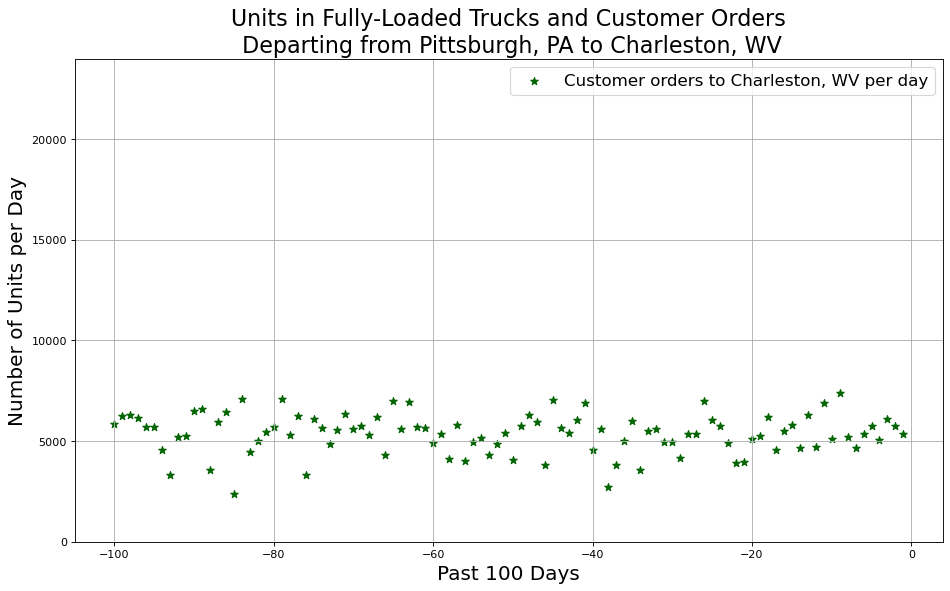

In [4]:
fig, ax = plt.subplots(figsize=(14,8), dpi=80)
X = np.arange(-100, 0)

x = np.arange(-100, 0)
Y5 = [5867., 6231., 6320., 6142., 5678., 5692., 4553., 3333., 5228.,
        5240., 6486., 6615., 3562., 5939., 6461., 2351., 7085., 4442.,
        5012., 5475., 5679., 7095., 5310., 6270., 3307., 6080., 5649.,
        4859., 5543., 6352., 5612., 5750., 5315., 6204., 4312., 6978.,
        5624., 6921., 5697., 5631., 4900., 5371., 4136., 5816., 4011.,
        4950., 5161., 4305., 4844., 5419., 4041., 5761., 6287., 5925.,
        3822., 7018., 5669., 5413., 6051., 6870., 4534., 5578., 2705.,
        3795., 4997., 6003., 3545., 5480., 5609., 4951., 4950., 4182.,
        5349., 5330., 6971., 6068., 5743., 4882., 3921., 3985., 5123.,
        5264., 6196., 4571., 5495., 5792., 4682., 6305., 4725., 6878.,
        5092., 7375., 5220., 4647., 5359., 5744., 5031., 6112., 5771.,
        5342.]

ax.scatter(X, Y5, c='darkgreen', marker='*', s=50, label="Customer orders to Charleston, WV per day");
ax.set_ylim(0, 24000);
ax.grid(True)

plt.title("Units in Fully-Loaded Trucks and Customer Orders\n Departing from Pittsburgh, PA to Charleston, WV", fontsize=20)
plt.xlabel('Past 100 Days', fontsize=18)
plt.ylabel('Number of Units per Day', fontsize=18);
plt.legend(fontsize=15)
plt.show()

In the case of Charleston, WV, historically there hasn't been enough customer demand for there to be a need for a second trailer.  This is probably easier seen with a box and whisker plot.

<ipython-input-5-e70d0ca3bb97>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(ax.get_yticks(), fontsize=14)


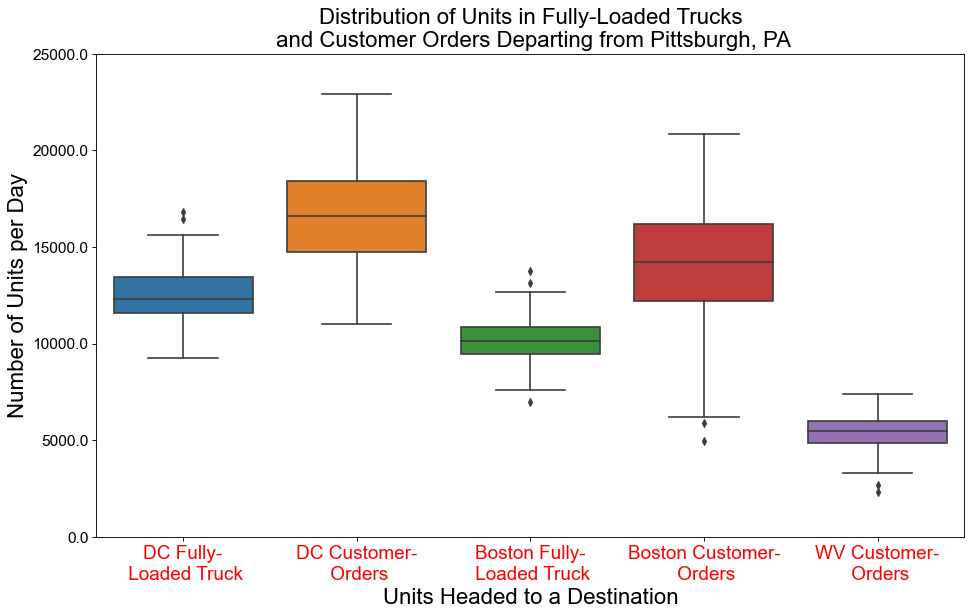

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, ax = plt.subplots(figsize=(14,8), dpi=80)
data = (DC, Y2, Boston, Y4, Y5)
boxplot = sns.boxplot(data = data)
plt.xlabel("Units Headed to a Destination", size=20)
plt.ylabel('Number of Units per Day', size=20)
plt.title("Distribution of Units in Fully-Loaded Trucks\n and Customer Orders Departing from Pittsburgh, PA", size=20)
ax.set_ylim(0, 25000)
ax.set_xticklabels(['DC Fully-\n Loaded Truck', 'DC Customer-\n Orders', 'Boston Fully-\n Loaded Truck',
                    'Boston Customer-\n Orders', 'WV Customer-\n Orders'], fontsize=17, color='r')
ax.set_yticklabels(ax.get_yticks(), fontsize=14)
sns.set_style("whitegrid");

In [6]:
max_number_of_pallets = []  # This is designed to be changed
level_of_risk = []  # This is designed to be changed
loaded_pallets = [] #This is designed to be updated
cont = 'y'

def min_expected_items(destination):
    return (np.mean(destination) - (level_of_risk)*(np.std(destination)))

def min_expected_items_per_pallet(destination):
    return min_expected_items(destination)/(max_number_of_pallets)

def number_of_remaining_pallets(loaded_pallets):
    return (max_number_of_pallets - loaded_pallets)
    
def estimate_for_remaining_units(destination): 
    return (min_expected_items_per_pallet(destination))*(number_of_remaining_pallets(loaded_pallets))    

print('Please select operation' \
        ' 1. DC ' \
        ' 2. Boston ')

while cont == 'y':      
    
    select = input('Select operations from 1, 2: ')
    max_number_of_pallets = int(input('Enter number of pallets in a fully loaded trailer: '))
    level_of_risk = int(input('Enter level of risk measured in standard deviations: '))
    loaded_pallets = int(input('Enter number of loaded pallets: '))

    if select == '1':
        print('Capacity estimate for the remaining units to DC is', estimate_for_remaining_units(DC))
    elif select == '2':
        print('Capacity estimate for the remaining units to Boston is', estimate_for_remaining_units(Boston))
    else:
        print('Invalid input')
    cont = input('Continue? y/n:') 
    if cont == 'n':
         break

Please select operation 1. DC  2. Boston 
Select operations from 1, 2: 1
Enter number of pallets in a fully loaded trailer: 60
Enter level of risk measured in standard deviations: 3
Enter number of loaded pallets: 50
Capacity estimate for the remaining units to DC is 1337.6689676034562
Continue? y/n:n


In [7]:
min_expected_items(DC)

8026.013805620737

In [8]:
max_number_of_pallets = []  
level_of_risk = [] 
loaded_pallets = []
created_pallets = []
sent_units = []
cont = 'y'

def remaining_pallets_minus_created(created_pallets):
    return (number_of_remaining_pallets(loaded_pallets) - created_pallets)
def remaining_units_minus_sent(destination):
    return (((min_expected_items_per_pallet(destination))*(remaining_pallets_minus_created(created_pallets))- sent_units))
 
            
print('Please select operation' \
        ' 1. DC ' \
        ' 2. Boston ')  

while cont == 'y':      
    
    select = input('Select operations from 1, 2: ')
    max_number_of_pallets = int(input('Enter number of pallets in a fully loaded trailer: '))
    level_of_risk = int(input('Enter level of risk measured in standard deviations: '))
    loaded_pallets = int(input('Enter number of loaded pallets: '))
    created_pallets = int(input('Enter number of created pallets: '))
    sent_units = int(input('Enter number of sent units: '))

    if select == '1':
        print('Capacity estimate for the remaining units to DC is', remaining_units_minus_sent(DC))
    elif select == '2':
        print('Capacity estimate for the remaining units to Boston is', remaining_units_minus_sent(Boston))
    else:
        print('Invalid input')
    cont = input('Continue? y/n:') 
    if cont == 'n':
         break

Please select operation 1. DC  2. Boston 
Select operations from 1, 2: 1
Enter number of pallets in a fully loaded trailer: 60
Enter level of risk measured in standard deviations: 3
Enter number of loaded pallets: 50
Enter number of created pallets: 3
Enter number of sent units: 7
Capacity estimate for the remaining units to DC is 929.3682773224193
Continue? y/n:n


In [9]:
"Washington, DC" 
dc_cust_for_next_14_days = np.random.normal(loc=17000, scale= 3000, size =(1,14))
dc_cust_next14 = dc_cust_for_next_14_days.round()

dc_60p_for_next_14_days = np.random.normal(loc=12500, scale= 1500, size =(1,25))
dc_60p_next14 = dc_60p_for_next_14_days.round()

"Boston, Mass"
Boston_cust_for_next_14_days = np.random.normal(loc=14250, scale= 2500, size=(1, 14))
Boston_cust_next14 = Boston_cust_for_next_14_days.round()

Boston_60p_for_next_14_days = np.random.normal(loc=10250, scale=1000, size=(1, 25))
Boston_60p_next14 = Boston_60p_for_next_14_days.round()

In [46]:
#The following are the values I got (your results will vary),  I am assing these results to variable 
#names so that my numbers don't vary each time the random number generator is run.

dc_cust_next = [16222, 12637, 17212, 14121, 14102, 18349, 15233, 19564, 17695, 18743,
  17400, 20523, 16798,  18676]
dc_60p_next = [13819, 13086, 13252, 12084, 13591, 13745, 13090, 11728,
        11890, 11789, 11120, 11270, 12826, 13133, 11710, 11984, 12687, 
        11556, 13912, 15257, 12408, 13599, 10604, 12767, 12605]
Boston_cust_next = [16149, 14060, 13922, 9125, 10958,  9684, 11880, 14909,  9762, 11110,
  12602, 16271, 15147, 12063]
Boston_60p_next = [7825,  8447, 11400, 11058, 11380,  9556,  9825, 11023,
        11288,  9884,  9993, 10612,  8205, 11966, 11762, 10125, 10386, 
        12114, 9058, 11544, 9838, 9855, 11232, 8820, 9467]

In [97]:
compare_list = [sum(x > y for x,y in zip(dc_cust_next, dc_60p_next))] + [len(dc_cust_next)]

number_trucks = sum(compare_list) 
print (f"{number_trucks} trucks are needed if DC loads are not combined.")

compare_list2 =  [sum(x > y for x,y in zip(Boston_cust_next, Boston_60p_next))] + [len(dc_cust_next)]
number_trucks2 = sum(compare_list2)
print (f"{number_trucks2} trucks are needed if Boston loads are not combined.")

27 trucks are needed if DC loads are not combined.
25 trucks are needed if Boston loads are not combined.


I have created a couple of functions in order to do caclulations on our new data.  One of these functions, new_truck, is designed to cacluate how many trucks are needed for the number of customer orders.  The second function, loaded_truck, is designed to calculate the number of the highest priority items that remain.  The third function, loaded_truck_2, calculates the highest priority items that remain when a second or third truck is used.

In [11]:
def daily_new_units(new_units):
     return (new_units)/3

def double_min_expected_items(destination):
    return 2*(min_expected_items(destination))
    
def new_truck(new_units, middle_upgraded, destination):
    if daily_new_units(new_units) + middle_upgraded < min_expected_items(destination):
        return  "One truck is sufficient."
    if double_min_expected_items(destination) > daily_new_units(new_units) + middle_upgraded > min_expected_items(destination):
        return "Two trucks are sufficient."
    if daily_new_units(new_units) + middle_upgraded > double_min_expected_items(destination):
        return "Three trucks are needed."

In [12]:
new_truck(15000, 0, DC)

'One truck is sufficient.'

In [13]:
new_truck(10000, 5000, DC)

'Two trucks are sufficient.'

In [14]:
new_truck(20000, 10000, DC)

'Three trucks are needed.'

In [15]:
def loaded_truck(new_units, middle_upgraded, low_upgraded, unitsin60p):
    if daily_new_units(new_units) + middle_upgraded > unitsin60p:
        print("High-priority items remain")
        return daily_new_units(new_units) + middle_upgraded - unitsin60p
    elif 2 *daily_new_units(new_units) + middle_upgraded + low_upgraded > unitsin60p:
        print("Middle-priority items remain")
        return 2*daily_new_units(new_units) + middle_upgraded + low_upgraded - unitsin60p
    else:
        print('Low-priority items remain')
        return 3*daily_new_units(new_units) + middle_upgraded + low_upgraded - unitsin60p
    
    
def loaded_truck_2(highest_priority_items, next_highest_priority_items, lowest_priority_items, unitsin60p_truck2):
    if highest_priority_items > unitsin60p_truck2:
        print("Highest-priority items remain")
        return highest_priority_items - unitsin60p_truck2
    elif (highest_priority_items + next_highest_priority_items) > unitsin60p_truck2:
        print ("Next-highest priority items remain")
        return (highest_priority_items + next_highest_priority_items) -  unitsin60p_truck2
    elif (highest_priority_items + next_highest_priority_items + lowest_priority_items) > unitsin60p_truck2:
        print ("Lowest-priority items remain")
        return (highest_priority_items + next_highest_priority_items + lowest_priority_items) -  unitsin60p_truck2
    else: 
        print ("No remaining units")
        return

In [16]:
loaded_truck(30000, 20000, 5000, 13819)

High-priority items remain


16181.0

In [17]:
loaded_truck(20000, 2000, 2000, 13819)

Middle-priority items remain


3514.3333333333358

In [18]:
loaded_truck(10000, 3000, 2000, 13819)

Low-priority items remain


1181.0

Day1 - 16222 is the number of customer orders for DC's first day.  We are starting from scratch so we don't have any orders carrying over from the prior day, thus middle_upgraded and low_upgraded is 0.  The number of units that fit into the first fully-loaded trailer is 13819 (as determined by the random number generator).  Now lets plug these values into our two fucntions to determine how many trailers are needed and what priority the remaining units are.

In [19]:
new_truck(16222, 0, DC) #Day1

'One truck is sufficient.'

In [20]:
loaded_truck(16222, 0, 0, 13819) #Day1

Low-priority items remain


2403.0

In [21]:
new_truck(12637, 0, DC) #Day2

'One truck is sufficient.'

In [22]:
loaded_truck(12637, 0, 2403, 13086)   #Day2

Low-priority items remain


1954.0

Interesetingly, our number of low-priority items actually decreased.  If one looks at the numbers, it becomes clear why this is the case - the number of customer orders (12637) was actually lower than the number of units that fit into the truck (13086), thus we are already utilizing space that otherwise would have gone unused.  Lets now carry-on to day 3.

In [23]:
new_truck(17212, 0, DC) #Day3

'One truck is sufficient.'

In [24]:
loaded_truck(17212, 0, 1954, 13252)  #Day3

Middle-priority items remain


176.66666666666606

In [25]:
daily_new_units(18676)

6225.333333333333

In [26]:
new_truck(14121, 177, DC) #Day4

'One truck is sufficient.'

In [27]:
loaded_truck(14121, 177, 5737, 12084) #Day4

Middle-priority items remain


3244.0

I will now complete the rest of the calculations for the two weeks without commentary.

In [28]:
new_truck(14102, 3244, DC) #Day5

'One truck is sufficient.'

In [29]:
loaded_truck(14102, 3244, 4707, 13591) #Day5

Middle-priority items remain


3761.3333333333358

In [30]:
new_truck(18349, 3761, DC) #Day6

'Two trucks are sufficient.'

In [31]:
loaded_truck(18349, 3761, 4701, 13745)  #Day6 - Truck 1 

Middle-priority items remain


6949.666666666664

In [32]:
loaded_truck_2(0, 6950, 6116, 13090)  #Day6 - Truck 2

No remaining units


In [33]:
new_truck(15233, 0, DC) #Day7

'One truck is sufficient.'

In [34]:
loaded_truck(15233, 0, 0, 11728) #Day7

Low-priority items remain


3505.0

In [35]:
new_truck(19564, 0, DC) #Day8

'One truck is sufficient.'

In [36]:
loaded_truck(19564, 0, 3505, 11890) #Day8

Middle-priority items remain


4657.666666666664

In [37]:
new_truck(17695, 4658, DC)  #Day9

'Two trucks are sufficient.'

In [38]:
loaded_truck(17695, 4658, 6521, 11789) #Day9 - Truck 1

Middle-priority items remain


11186.666666666664

In [39]:
loaded_truck_2(0, 11187, 5898, 11120) #Day9 - Truck 2

Next-highest priority items remain


67

In [40]:
new_truck(18743, 67, DC)  #Day10

'One truck is sufficient.'

In [41]:
loaded_truck(18743, 67, 5898, 11270) #Day10

Middle-priority items remain


7190.333333333336

In [42]:
new_truck(17400, 7190, DC) #Day11

'Two trucks are sufficient.'

In [43]:
loaded_truck(17400, 7190, 6248, 12826) #Day11 - Truck 1

High-priority items remain


164.0

In [44]:
loaded_truck_2(164, 12048, 5800, 13133) #Day11 - Truck 2

Lowest-priority items remain


4879

In [45]:
new_truck(20523, 0, DC) #Day12

'One truck is sufficient.'

In [46]:
loaded_truck(20523, 0, 4879, 11710) #Day12

Middle-priority items remain


6851.0

In [47]:
new_truck(16798, 6851, DC) #Day13 

'Two trucks are sufficient.'

In [48]:
loaded_truck(16798, 6851, 6841, 11984) #Day13 - Truck 1

High-priority items remain


466.3333333333321

In [49]:
loaded_truck_2(466, 12440, 5599, 12687) #Day13 - Truck 2

Next-highest priority items remain


219

In [50]:
new_truck(18676, 219, DC) #Day14

'One truck is sufficient.'

In [51]:
loaded_truck(18676, 219, 5599, 11556) #Day14

Middle-priority items remain


6712.666666666664

Alright, so we have gone through 14 days.  First, lets check the math to make sure there are not any errors in the calculations (which can easily happen given the manual inputing of some of the data).  If everthing checks out, the sum total of the customer shipments should be equal to the total of units shipped in trailers plus remaining units minus unused space.  For DC, we had space for 24 more units on day 6 truck 2 and we had (6713 + 6225) remaining units on day 14.

In [52]:
sum(dc_cust_next) 

237275

In [53]:
13819 + 13086 + 13252 + 12084 + 13591 + 13745 + 13090 - 24 + 11728 + 11890 \
+ 11789 + 11120 + 11270 + 12826 + 13133 + 11710 + 11984 + 12687 + 11556 + 6713 + 6225

237274

In [44]:
tyte = [1, 2, 3, 4]
tytewyte = [8, 6, 5, 7]

list3 = [sum(x > y for x,y in zip(tytewyte, tyte))]

list3

[4]

In [24]:
type(tyte)

list

In [67]:
compare_list = [sum(x > y for x,y in zip(dc_cust_next, dc_60p_next))] + [14]

sum(compare_list)

27

In [41]:
compare_lists(tyte, tytewyte)

NameError: name 'index' is not defined

Let us now argue that we used the aforementioned calculations for our DC and Boston loads and it enabled trailers close to the maximum number of units to be sent.  For DC, the average unit ???  and for Boston, the average unit.  These numbers can now be used to determine how much cost savings represent from the previous methodology of sending out 14 trailers.   The equation for financial savings is...   The equation for environmental savings is...

In [ ]:
#fincancial savings

In [ ]:
#Environmental savings

The above coding works well for maximizing space utilization which may be the only cosideration for certain types of shipping.  If if is customer packages, these packages usually have padding which takes up space and reduces the overall weight of the load.  Thus weight may not be a factor for those types of facilies as thay are not at risk of going over the maximum weight for a trailer which is  .  But what about facilities that ship out different types of product such as a business supply company that ships out a lot of paper and bottled water, both of which are extremely heavy and can cause a trailer to be overweight?  In that case, weight may be the more important consideration.  This can be coded as follows:  

In [ ]:
#Weight 

But what if the facility in question doesn't know if weight or space is the limiting factor in determining what one can send in a trailer?  If one knows the weight of the items one is sending, one can combine statitistical updating for space with a weight limitation to determine how to fully utilize such trailers.

In addition to sending trailers to DC, Boston, and Charleston, WV, the facility in question also sends trailers to Besosa, Puerto Rico.  Unlike the other destinations, trailers to Besosa are always fully utilized because it is cost prohibitive to send partially loaded trailers to that destination.  Weight is not a factor as these trailers are well below the weight threshold.  There is a process the company can do to fit even more items in a trailer that is not usually done due to labor costs. While that may hold true for closer destinations such as DC, the question remains could this process be used to save money and gas to trailers heading to Besosa?  For the purposes of this illustration,  the process labor cost - hours-  items condensed is ... 

In [ ]:
#Financial savings (or cost)

In [ ]:
#Environmental savings

In [ ]:
[{ [Destination: Washington, DC.]  [Trucks: {1 [Number of pallets:] [Number of Items:]}, {2 [Number of pallets:] [Number of Items:]}
 {City:  Items  }
 { [Destination : Charlestown, WV ]}                                   
 {[Destination: Boston, Massachussettes]}                                   
                                    
                                    
#Work on -  I can figure this out now. Do this for 7 days, 14 trucks for two,  7 trucks for the third 

In [ ]:
#Develop code for a snowstorm andon???

In [ ]:
fig = plt.figure(figsize=(16, 10), dpi=80) 
# Creates one subplot within our figure and uses the classes fig and ax
fig, ax = plt.subplots(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
# Uses hue to add an extra element, and changes the palette
chart = sns.scatterplot(x='GrLivArea', y='SalePrice', data = test,
                        hue=test.OverallQual.values, legend='full', alpha = .7,
                        palette="BrBG")

# Setting axis ticks and formulating numbers
ax.yaxis.set_major_locator(ticker.MultipleLocator(100000.00))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(50000))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('${x:,.0f}'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(500))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(100))

# Naming the visual and each axis
fig.suptitle("The Positive Correlations between Home Sale Price,\n Sq Footage and Quality Rating", fontsize=26)
ax.set_xlabel("Total Square Feet")
ax.set_ylabel("Sale Price")

# Creating the legend
ax.get_legend().set_title("Overall Quality Ranking")

plt.tight_layout() 